In [136]:
import pandas as pd
import seaborn as sns
import numpy as np

df = pd.read_csv('athlete_events.csv')
df.shape

(271116, 15)

In [2]:
list(df)

['ID',
 'Name',
 'Sex',
 'Age',
 'Height',
 'Weight',
 'Team',
 'NOC',
 'Games',
 'Year',
 'Season',
 'City',
 'Sport',
 'Event',
 'Medal']

In [3]:
#Renvoie le pourcentage des valeurs incomplètes
def NaN_percent(df, column_name) :
    row_count = df[column_name].shape[0]
    empty_values = row_count - df[column_name].count()
    return (100.0*empty_values)/row_count
for i in list(df):
    print(i + ": " + str(round(NaN_percent(df,i),2))+"%")

ID: 0.0%
Name: 0.0%
Sex: 0.0%
Age: 3.49%
Height: 22.19%
Weight: 23.19%
Team: 0.0%
NOC: 0.0%
Games: 0.0%
Year: 0.0%
Season: 0.0%
City: 0.0%
Sport: 0.0%
Event: 0.0%
Medal: 85.33%


In [4]:
nb_rows = df.shape[0]
nb_athlete = len(df.Name.unique())
part_p_athl = round(nb_rows/nb_athlete, 1)
nb_medailles = len(df[df.Medal.fillna("None") != "None"].Name.unique())
ratio_athl_med = round((nb_medailles/nb_athlete)*100, 1)

print("Nombre participations : ", nb_rows,
      "\nNombre athletes : ", nb_athlete,
      "\nNombre moyen de participations par athlètes : ", part_p_athl,
      "\nNombre athletes medaillés : ", nb_medailles,
      "\nRatio athletes medaillés sur total athlètes : ", ratio_athl_med, "%")

Nombre participations :  271116 
Nombre athletes :  134732 
Nombre moyen de participations par athlètes :  2.0 
Nombre athletes medaillés :  28202 
Ratio athletes medaillés sur total athlètes :  20.9 %


In [27]:
medailles_par_equipe = df.groupby(['Team','Medal']).Medal.agg('count')
#trier par quantité
medailles_par_equipe = medailles_par_equipe.reset_index(name='count').sort_values(['count'], ascending=False)
medailles_par_equipe.head(10)

,Team,Medal,count
726,United States,Gold,2474
727,United States,Silver,1512
725,United States,Bronze,1233
627,Soviet Union,Gold,1058
628,Soviet Union,Silver,716
263,Germany,Gold,679
262,Germany,Bronze,678
626,Soviet Union,Bronze,677
264,Germany,Silver,627
278,Great Britain,Silver,582


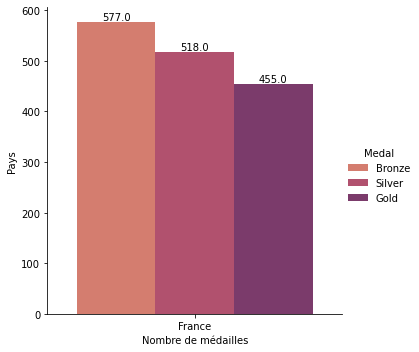

In [6]:
stats_france = medailles_par_equipe[medailles_par_equipe.Team=="France"]

g = sns.catplot(
    data=stats_france, kind="bar", hue="Medal",
    x="Team", y="count", palette="flare"
)
g.set_axis_labels("Nombre de médailles", "Pays")
ax = g.facet_axis(0, 0)

for c in ax.containers:
    labels = [f'{(v.get_height())}' for v in c]
    ax.bar_label(c, labels=labels, label_type='edge')

In [7]:
nb_femme = len(df[df.Sex=="F"].Name.unique())
nb_homme = len(df[df.Sex=="M"].Name.unique())
medailles_femme = df[df.Sex=="F"].Medal.count()
medailles_hommes = df[df.Sex=="M"].Medal.count()

print("nombre athlètes femme : {}".format(nb_femme))
print("médailles obtenues femme : {}".format(medailles_femme))
print("nombre athlètes homme : {}".format(nb_homme))
print("médailles obtenues homme : {}".format(medailles_hommes))
print("Depuis l'année : ")
df[df.Sex=="F"].Year.min()

nombre athlètes femme : 33808
médailles obtenues femme : 11253
nombre athlètes homme : 100979
médailles obtenues homme : 28530
Depuis l'année : 


1900

(<AxesSubplot:xlabel='Year', ylabel='Name'>,
 <AxesSubplot:xlabel='Year', ylabel='Name'>)

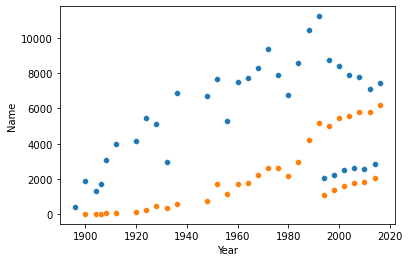

In [8]:
nb_femme_per_year = df[df.Sex=="F"].groupby("Year").agg("count").Name
nb_homme_per_year = df[df.Sex=="M"].groupby("Year").agg("count").Name
(sns.scatterplot(data=nb_homme_per_year),sns.scatterplot(data=nb_femme_per_year))

In [9]:
hommes = df[df.Sex=='M']
poids_taille_par_sport_hommes = hommes.groupby(['Sport'])[['Weight','Height']].agg(['min','max','mean'])

In [10]:
poids_taille_par_sport_hommes.Weight.dropna().sort_values('mean', ascending=False)[:5]

,min,max,mean
Sport,,,
Tug-Of-War,75.0,118.0,95.615385
Basketball,59.0,156.0,91.683529
Rugby Sevens,65.0,113.0,91.006623
Bobsleigh,55.0,145.0,90.387385
Beach Volleyball,62.0,110.0,89.512821


In [11]:
poids_taille_par_sport = hommes.groupby(['Sport'])[['Weight','Height']].agg(['min','max','mean'])


In [12]:
poids_taille_par_sport.Weight.dropna().sort_values('mean', ascending=True)[:5]
print(poids_taille_par_sport)
#sns.relplot(data="poids_taille_par_sport"
 #           x="horsepower", y="mpg", hue="origin", size="weight",
 #           sizes=(40, 400), alpha=.5, palette="muted",
  #          height=6, data=mpg)

                 Weight                   Height                   
                    min    max       mean    min    max        mean
Sport                                                              
Aeronautics         NaN    NaN        NaN    NaN    NaN         NaN
Alpine Skiing      50.0  107.0  78.626035  142.0  200.0  177.891374
Alpinism            NaN    NaN        NaN    NaN    NaN         NaN
Archery            46.0  130.0  77.066866  157.0  197.0  178.477842
Art Competitions   59.0   93.0  75.290909  150.0  190.0  174.896552
...                 ...    ...        ...    ...    ...         ...
Tug-Of-War         75.0  118.0  95.615385  170.0  195.0  182.480000
Volleyball         56.0  120.0  86.925926  170.0  219.0  193.265660
Water Polo         61.0  125.0  87.706172  154.0  206.0  186.801739
Weightlifting      50.0  176.5  80.251796  140.0  205.0  169.153061
Wrestling          47.0  190.0  76.400640  137.0  214.0  172.870686

[63 rows x 6 columns]


In [13]:
print(df[df.Medal.fillna("None") != "None"].Medal.value_counts())
nb_medailles = df[df.Medal.fillna("None") != "None"].shape[0]
print("Nombre de médailles distribués : ",nb_medailles)

Gold      13372
Bronze    13295
Silver    13116
Name: Medal, dtype: int64
Nombre de médailles distribués :  39783


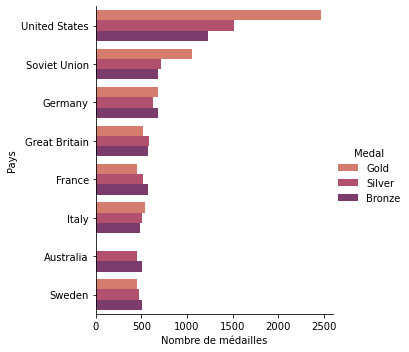

In [14]:
medailles_par_equipe = df.groupby(['Team','Medal']).Medal.agg('count')
medailles_par_equipe = medailles_par_equipe.reset_index(name='count').sort_values(['count'], ascending=False).head(23) 

g = sns.catplot(
    data=medailles_par_equipe, kind="bar", hue="Medal",
    y="Team", x="count", palette="flare"
)
g.set_axis_labels("Nombre de médailles", "Pays")

Nombre de médailles distribués :  39783
Nombre de médailles par athlète :  1.0


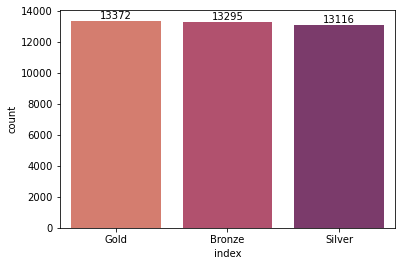

In [15]:
medals_type = df[df.Medal.fillna("None") != "None"].Medal.value_counts()
medals_type = medals_type.reset_index(name='count').sort_values(['count'], ascending=False) 

ax = sns.barplot(
    data=medals_type,
    x="index", y="count", palette="flare"
)

for container in ax.containers:
    ax.bar_label(container)

nb_medailles_dist = df[df.Medal.fillna("None") != "None"].shape[0]
print("Nombre de médailles distribués : ",nb_medailles_dist)
print("Nombre de médailles par athlète : ", round(nb_medailles_dist/nb_medailles,2))

In [16]:
femmes = df[df.Sex=='F']
poids_taille_par_sport_femmes = femmes.groupby(['Sport'])[['Weight','Height']].agg(['min','max','mean'])

In [17]:
poids_taille_par_sport_femmes.Weight.dropna().sort_values('mean', ascending=False)[:5]

,min,max,mean
Sport,,,
Basketball,50.0,128.0,73.685170
Bobsleigh,55.0,95.0,72.804196
Water Polo,50.0,104.0,70.180328
Rowing,39.0,97.0,70.102214
Volleyball,30.0,98.0,69.333779


In [18]:
poids_taille_par_sport_femmes.Weight.dropna().sort_values('mean', ascending=True)[:5]

,min,max,mean
Sport,,,
Gymnastics,25.0,72.0,47.791276
Rhythmic Gymnastics,30.0,64.0,48.760976
Figure Skating,32.0,68.0,49.861039
Ski Jumping,43.0,62.0,52.615385
Trampolining,43.0,60.0,52.893333


In [19]:
femmes_uniques = femmes[femmes.Medal.fillna("None") != "None"].drop_duplicates(subset = ["Name"])

femmes_uniques = femmes_uniques.Height.dropna()


In [22]:
hiver = df[df.Season=="Winter"]

hiver_pays = hiver.groupby(["NOC","Year"]).NOC.agg("count")
print(hiver_pays)

NOC  Year
AHO  1988      3
     1992      2
ALB  2006      3
     2010      2
     2014      2
            ... 
YUG  1980     27
     1984    115
     1988     49
     1992     60
ZIM  2014      2
Name: NOC, Length: 1027, dtype: int64


In [23]:
ete = df[df.Season=="Summer"]

ete_pays = ete.groupby(["NOC","Year","Medal","Event"]).NOC.agg("count")
ete_pays = ete_pays.reset_index(name='count')
print(ete_pays)

       NOC  Year   Medal                                          Event  count
0      AFG  2008  Bronze                      Taekwondo Men's Flyweight      1
1      AFG  2012  Bronze                  Taekwondo Men's Featherweight      1
2      AHO  1988  Silver                       Sailing Mixed Windsurfer      1
3      ALG  1984  Bronze                 Boxing Men's Light-Heavyweight      1
4      ALG  1984  Bronze                      Boxing Men's Middleweight      1
...    ...   ...     ...                                            ...    ...
16047  ZIM  2004  Silver         Swimming Women's 100 metres Backstroke      1
16048  ZIM  2008    Gold         Swimming Women's 200 metres Backstroke      1
16049  ZIM  2008  Silver         Swimming Women's 100 metres Backstroke      1
16050  ZIM  2008  Silver  Swimming Women's 200 metres Individual Medley      1
16051  ZIM  2008  Silver  Swimming Women's 400 metres Individual Medley      1

[16052 rows x 5 columns]


In [138]:
pays_participants = df[["ID", "Games", "Medal", "NOC", "Season"]]
summer_pays_participants = pays_participants[pays_participants.Season=="Summer"]
winter_pays_participants = pays_participants[pays_participants.Season=="Winter"]
summer_pays_participants = summer_pays_participants.groupby("NOC", as_index = False).agg({"ID": "count", "Games": pd.Series.nunique, "Medal" : "count"})
winter_pays_participants = winter_pays_participants.groupby("NOC", as_index = False).agg({"ID": "count", "Games": pd.Series.nunique, "Medal" : "count"})
print(summer_pays_participants)

     NOC    ID  Games  Medal
0    AFG   126     14      2
1    AHO    74     13      1
2    ALB    63      8      0
3    ALG   539     13     17
4    AND    53     11      0
..   ...   ...    ...    ...
225  YEM    32      7      0
226  YMD     5      1      0
227  YUG  2046     16    383
228  ZAM   183     13      2
229  ZIM   309     13     22

[230 rows x 4 columns]


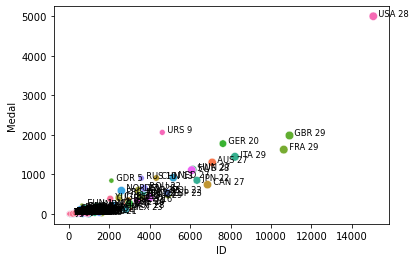

In [160]:
ax = sns.scatterplot(x="ID", y="Medal", size="Games", hue="NOC", data=summer_pays_participants)
ax.legend_.remove()
for line in range(0,summer_pays_participants.shape[0]):
     ax.text(summer_pays_participants.ID.iloc[line], summer_pays_participants.Medal.iloc[line], "  "+summer_pays_participants.NOC.iloc[line]+" "+str(summer_pays_participants.Games.iloc[line]), horizontalalignment='left', size='small', color='black', weight='medium')

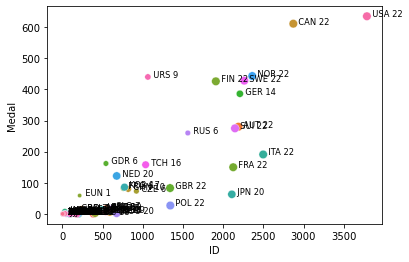

In [159]:
ax = sns.scatterplot(x="ID", y="Medal", size="Games", hue="NOC", data=winter_pays_participants)
ax.legend_.remove()
for line in range(0,winter_pays_participants.shape[0]):
     ax.text(winter_pays_participants.ID.iloc[line], winter_pays_participants.Medal.iloc[line], "  "+winter_pays_participants.NOC.iloc[line]+" "+str(winter_pays_participants.Games.iloc[line]), horizontalalignment='left', size='small', color='black', weight='medium')